In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('Gurgaon_properties_missing_value_imputation.csv')

In [285]:
pd.set_option('display.max_columns',None)

In [286]:
df.shape

(3554, 18)

In [287]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5753.0   
1          flat        dlf regal gardens   sector 90   1.29          9021.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

   bedRoom  bathroom balcony  floorNum   agePossession  built_up_area  \
0      2.0       2.0       3       9.0  Relatively New         1148.0   
1      3.0       3.0       3       7.0  Relatively New         1540.0   
2      2.0       2.0      3+      14.0  Relatively New         1201.0   
3      4.0       5.0      3+      10.0  Relatively New         2600.0   
4      2.0       2.0       2      14.0    New Property          633.0   

   servant room  pooja room  study room  others  store room  furnishing_type  \
0           0.0         1.0         0.0     0.0         0.0              0.0   
1           0.0         0.0         1.0     0.0         0.0              0.0   
2           0.0         1.0         0.0     0.0         0.0              0.0   
3           1.0         1.0         0.0     0.0         0.0              1.0   
4           0.0         0.0         0.0     0.0         0.0              0.0   

   luxury_score  
0         133.0  
1         224.0  
2         228.0  
3         228.0  
4          19.0

In [288]:
train_df = df.drop(columns=['society','price_per_sqft'],axis=1)

In [289]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sohna road   0.73      2.0       2.0       3       9.0   
1          flat   sector 90   1.29      3.0       3.0       3       7.0   
2          flat  sector 107   0.75      2.0       2.0      3+      14.0   
3          flat  sector 102   2.50      4.0       5.0      3+      10.0   
4          flat  sector 67a   0.60      2.0       2.0       2      14.0   

    agePossession  built_up_area  servant room  pooja room  study room  \
0  Relatively New         1148.0           0.0         1.0         0.0   
1  Relatively New         1540.0           0.0         0.0         1.0   
2  Relatively New         1201.0           0.0         1.0         0.0   
3  Relatively New         2600.0           1.0         1.0         0.0   
4    New Property          633.0           0.0         0.0         0.0   

   others  store room  furnishing_type  luxury_score  
0     0.0         0.0              0.0         133.0  
1     0.0         0.0              0.0         224.0  
2     0.0         0.0              0.0         228.0  
3     0.0         0.0              1.0         228.0  
4     0.0         0.0              0.0          19.0

### Luxury Score

In [290]:
def luxury_score_categorize(item):
    if item>0 and item<50:
        return 'low'
    elif item>50 and item<150:
        return 'medium'
    elif item>150:
        return 'high'
    else:
        return 'none'

In [291]:
train_df['luxury_category'] = train_df['luxury_score'].apply(luxury_score_categorize)

In [292]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sohna road   0.73      2.0       2.0       3       9.0   
1          flat   sector 90   1.29      3.0       3.0       3       7.0   
2          flat  sector 107   0.75      2.0       2.0      3+      14.0   
3          flat  sector 102   2.50      4.0       5.0      3+      10.0   
4          flat  sector 67a   0.60      2.0       2.0       2      14.0   

    agePossession  built_up_area  servant room  pooja room  study room  \
0  Relatively New         1148.0           0.0         1.0         0.0   
1  Relatively New         1540.0           0.0         0.0         1.0   
2  Relatively New         1201.0           0.0         1.0         0.0   
3  Relatively New         2600.0           1.0         1.0         0.0   
4    New Property          633.0           0.0         0.0         0.0   

   others  store room  furnishing_type  luxury_score luxury_category  
0     0.0         0.0              0.0         133.0          medium  
1     0.0         0.0              0.0         224.0            high  
2     0.0         0.0              0.0         228.0            high  
3     0.0         0.0              1.0         228.0            high  
4     0.0         0.0              0.0          19.0             low

In [293]:
train_df['luxury_category'].value_counts()

medium    1649
high       791
low        680
none       434
Name: luxury_category, dtype: int64

### Floor Number

In [294]:
def categorize_floor(item):
    if 0 <= item <= 2:
        return 'Low Floor'
    elif 3 <= item <= 10:
        return 'Mid Floor'
    elif 11 <= item <= 51:
        return 'High Floor'
    else:
        return None

In [295]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [296]:
train_df.head()

property_type      sector  price  bedRoom  bathroom balcony  floorNum  \
0          flat  sohna road   0.73      2.0       2.0       3       9.0   
1          flat   sector 90   1.29      3.0       3.0       3       7.0   
2          flat  sector 107   0.75      2.0       2.0      3+      14.0   
3          flat  sector 102   2.50      4.0       5.0      3+      10.0   
4          flat  sector 67a   0.60      2.0       2.0       2      14.0   

    agePossession  built_up_area  servant room  pooja room  study room  \
0  Relatively New         1148.0           0.0         1.0         0.0   
1  Relatively New         1540.0           0.0         0.0         1.0   
2  Relatively New         1201.0           0.0         1.0         0.0   
3  Relatively New         2600.0           1.0         1.0         0.0   
4    New Property          633.0           0.0         0.0         0.0   

   others  store room  furnishing_type  luxury_score luxury_category  \
0     0.0         0.0              0.0         133.0          medium   
1     0.0         0.0              0.0         224.0            high   
2     0.0         0.0              0.0         228.0            high   
3     0.0         0.0              1.0         228.0            high   
4     0.0         0.0              0.0          19.0             low   

  floor_category  
0      Mid Floor  
1      Mid Floor  
2     High Floor  
3      Mid Floor  
4     High Floor

In [ ]:
train_df.to_csv('train_df.csv',index='')

In [297]:
train_df.drop(columns=['floorNum','luxury_score'],axis=1,inplace=True)

In [298]:
categorical_col = train_df.select_dtypes(include=['object']).columns

In [299]:
categorical_col

Index(['property_type', 'sector', 'balcony', 'agePossession',
       'luxury_category', 'floor_category'],
      dtype='object')

In [300]:
from sklearn.preprocessing import OrdinalEncoder

train_df_encoded = train_df.copy()

oe = OrdinalEncoder()

for col in categorical_col:
    train_df_encoded[col] = oe.fit_transform(train_df_encoded[[col]])

In [301]:
train_df_encoded.head()

property_type  sector  price  bedRoom  bathroom  balcony  agePossession  \
0            0.0   111.0   0.73      2.0       2.0      3.0            3.0   
1            0.0   103.0   1.29      3.0       3.0      3.0            3.0   
2            0.0     9.0   0.75      2.0       2.0      4.0            3.0   
3            0.0     4.0   2.50      4.0       5.0      4.0            3.0   
4            0.0    76.0   0.60      2.0       2.0      2.0            1.0   

   built_up_area  servant room  pooja room  study room  others  store room  \
0         1148.0           0.0         1.0         0.0     0.0         0.0   
1         1540.0           0.0         0.0         1.0     0.0         0.0   
2         1201.0           0.0         1.0         0.0     0.0         0.0   
3         2600.0           1.0         1.0         0.0     0.0         0.0   
4          633.0           0.0         0.0         0.0     0.0         0.0   

   furnishing_type  luxury_category  floor_category  
0              0.0              2.0             2.0  
1              0.0              0.0             2.0  
2              0.0              0.0             0.0  
3              1.0              0.0             2.0  
4              0.0              1.0             0.0

In [302]:
x_label = train_df_encoded.drop(columns='price',axis=1)
y_label = train_df_encoded[['price']]

In [303]:
x_label.shape

(3554, 15)

In [304]:
y_label.shape

(3554, 1)

In [305]:
y_label = train_df_encoded[['price']]

In [306]:
y_label.shape

(3554, 1)

### Correlation Technique

<AxesSubplot:>

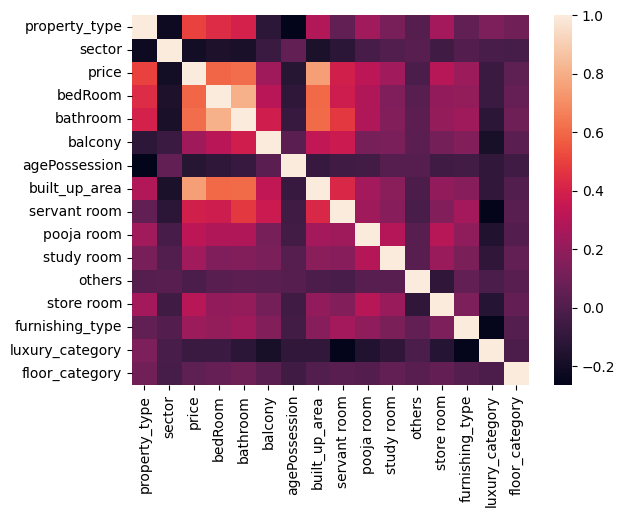

In [307]:
sns.heatmap(train_df_encoded.corr())

In [308]:
fs_df1 = train_df_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'features','price':'corr_coeff'})

In [309]:
fs_df1

features  corr_coeff
0            sector   -0.201678
1             price    1.000000
2           bedRoom    0.591289
3          bathroom    0.609777
4           balcony    0.236711
5     agePossession   -0.132989
6     built_up_area    0.748574
7      servant room    0.391930
8        pooja room    0.319852
9        study room    0.242955
10           others   -0.013064
11       store room    0.305677
12  furnishing_type    0.225336
13  luxury_category   -0.071444
14   floor_category    0.042745

### 'Feature Importance' Random Forest Regressor

In [310]:
from sklearn.ensemble import RandomForestRegressor

In [311]:
rf_obj = RandomForestRegressor(n_estimators=100, random_state=42)
rf_obj.fit(x_label,y_label)

frf_df2 = pd.DataFrame({'features':x_label.columns,'rf_importances':rf_obj.feature_importances_})


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [312]:
frf_df2.sort_values('rf_importances',ascending=False)

features  rf_importances
6     built_up_area        0.650665
0     property_type        0.100713
1            sector        0.099081
2           bedRoom        0.026083
3          bathroom        0.023555
7      servant room        0.018966
5     agePossession        0.013111
4           balcony        0.011883
13  luxury_category        0.011061
12  furnishing_type        0.010434
9        study room        0.008841
11       store room        0.008413
8        pooja room        0.007468
14   floor_category        0.006346
10           others        0.003378

### feature importances 'Gradient Boosting' 

In [313]:
from sklearn.ensemble import GradientBoostingRegressor

In [314]:
gb_obj = GradientBoostingRegressor()
gb_obj.fit(x_label,y_label)

fgb_df3 = pd.DataFrame({'features':x_label.columns,'gb_importances':gb_obj.feature_importances_})

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [315]:
fgb_df3.sort_values('gb_importances',ascending=False)

features  gb_importances
6     built_up_area        0.676089
1            sector        0.100425
0     property_type        0.099144
2           bedRoom        0.039576
3          bathroom        0.035275
7      servant room        0.025731
11       store room        0.007152
13  luxury_category        0.005538
12  furnishing_type        0.003380
5     agePossession        0.003095
9        study room        0.002732
4           balcony        0.001076
14   floor_category        0.000441
10           others        0.000309
8        pooja room        0.000036

### RFE

In [316]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x_label.shape[1], step=1)
selector_label = selector_label.fit(x_label, y_label)

# Get the selected features based on RFE
selected_features = x_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df4 = pd.DataFrame({
    'features': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df4

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


features  rfe_score
6     built_up_area   0.644270
1            sector   0.107683
0     property_type   0.101263
3          bathroom   0.025840
2           bedRoom   0.024328
7      servant room   0.017499
5     agePossession   0.012971
4           balcony   0.011734
13  luxury_category   0.011415
12  furnishing_type   0.011023
9        study room   0.007903
11       store room   0.007311
8        pooja room   0.006656
14   floor_category   0.006255
10           others   0.003849

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_label)

lr_obj = LinearRegression()
lr_obj.fit(x_scaled,y_label)

#lr_df5 = pd.DataFrame({'features':x_label.columns,'lr_importances':lr_obj.coef_})


LinearRegression()

In [318]:
x = pd.DataFrame(lr_obj.coef_)

In [319]:
x = x.transpose()

In [320]:
x = x.set_index(x_label.columns)

In [321]:
x = x.reset_index()

In [322]:
x = x.rename(columns={'index':'features'})

In [323]:
x = x.rename(columns={0:'lr_importances'})

In [324]:
x

features  lr_importances
0     property_type        0.725347
1            sector       -0.061929
2           bedRoom        0.014429
3          bathroom        0.266903
4           balcony       -0.008360
5     agePossession       -0.001981
6     built_up_area        1.510432
7      servant room        0.156698
8        pooja room        0.077143
9        study room        0.176909
10           others       -0.030639
11       store room        0.204763
12  furnishing_type        0.167064
13  luxury_category        0.016915
14   floor_category       -0.014571

### SHAP

In [325]:
!pip install shap

In [326]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


array([[-0.19721824, -0.47427137, -0.04449242, ..., -0.012963  ,
         0.00909103, -0.01316996],
       [-0.22739139, -0.50144449,  0.00357911, ..., -0.0112041 ,
         0.02995852, -0.00652201],
       [-0.19327853, -0.21409208, -0.05547256, ..., -0.01833022,
         0.01292909,  0.03366884],
       ...,
       [ 0.42283324,  0.04020701, -0.02083192, ..., -0.01253273,
        -0.05220984, -0.01198262],
       [-0.19068071, -0.39450865, -0.06329228, ..., -0.01041689,
         0.00687016, -0.00747155],
       [-0.48037848, -0.28255701, -0.02788996, ..., -0.06843465,
         0.00349511, -0.03002236]])

In [327]:
fi_df5 = pd.DataFrame({
    'features':x_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df5

features  SHAP_score
6     built_up_area    1.250102
0     property_type    0.477162
1            sector    0.372050
3          bathroom    0.112439
7      servant room    0.088299
2           bedRoom    0.057919
4           balcony    0.035426
13  luxury_category    0.028719
12  furnishing_type    0.028261
5     agePossession    0.025162
14   floor_category    0.024519
9        study room    0.021458
11       store room    0.016737
8        pooja room    0.012246
10           others    0.006931

In [328]:
final_df = fs_df1.merge(frf_df2,on='features').merge(fgb_df3,on='features').merge(fi_df4,on='features').merge(x,on='features').merge(fi_df5,on='features')

In [329]:
final_df = final_df.set_index('features')

In [330]:
final_df

corr_coeff  rf_importances  gb_importances  rfe_score  \
features                                                                 
sector            -0.201678        0.099081        0.100425   0.107683   
bedRoom            0.591289        0.026083        0.039576   0.024328   
bathroom           0.609777        0.023555        0.035275   0.025840   
balcony            0.236711        0.011883        0.001076   0.011734   
agePossession     -0.132989        0.013111        0.003095   0.012971   
built_up_area      0.748574        0.650665        0.676089   0.644270   
servant room       0.391930        0.018966        0.025731   0.017499   
pooja room         0.319852        0.007468        0.000036   0.006656   
study room         0.242955        0.008841        0.002732   0.007903   
others            -0.013064        0.003378        0.000309   0.003849   
store room         0.305677        0.008413        0.007152   0.007311   
furnishing_type    0.225336        0.010434        0.003380   0.011023   
luxury_category   -0.071444        0.011061        0.005538   0.011415   
floor_category     0.042745        0.006346        0.000441   0.006255   

                 lr_importances  SHAP_score  
features                                     
sector                -0.061929    0.372050  
bedRoom                0.014429    0.057919  
bathroom               0.266903    0.112439  
balcony               -0.008360    0.035426  
agePossession         -0.001981    0.025162  
built_up_area          1.510432    1.250102  
servant room           0.156698    0.088299  
pooja room             0.077143    0.012246  
study room             0.176909    0.021458  
others                -0.030639    0.006931  
store room             0.204763    0.016737  
furnishing_type        0.167064    0.028261  
luxury_category        0.016915    0.028719  
floor_category        -0.014571    0.024519

In [331]:
final_df = final_df.divide(final_df.sum(axis=0), axis=1)

In [332]:
final_df

corr_coeff  rf_importances  gb_importances  rfe_score  \
features                                                                 
sector            -0.061195        0.110177        0.111477   0.119816   
bedRoom            0.179414        0.029004        0.043932   0.027069   
bathroom           0.185024        0.026193        0.039158   0.028751   
balcony            0.071825        0.013214        0.001195   0.013056   
agePossession     -0.040353        0.014580        0.003436   0.014433   
built_up_area      0.227138        0.723535        0.750497   0.716862   
servant room       0.118923        0.021090        0.028563   0.019470   
pooja room         0.097052        0.008305        0.000040   0.007405   
study room         0.073719        0.009831        0.003032   0.008794   
others            -0.003964        0.003757        0.000343   0.004283   
store room         0.092751        0.009355        0.007939   0.008134   
furnishing_type    0.068373        0.011603        0.003752   0.012265   
luxury_category   -0.021678        0.012300        0.006147   0.012702   
floor_category     0.012970        0.007057        0.000489   0.006960   

                 lr_importances  SHAP_score  
features                                     
sector                -0.025034    0.178847  
bedRoom                0.005833    0.027842  
bathroom               0.107893    0.054050  
balcony               -0.003379    0.017030  
agePossession         -0.000801    0.012095  
built_up_area          0.610578    0.600933  
servant room           0.063344    0.042446  
pooja room             0.031184    0.005887  
study room             0.071514    0.010315  
others                -0.012386    0.003332  
store room             0.082773    0.008045  
furnishing_type        0.067534    0.013585  
luxury_category        0.006838    0.013805  
floor_category        -0.005890    0.011786

In [333]:
final_df.mean(axis=1).sort_values(ascending=False)

features
built_up_area      0.604924
bathroom           0.073512
sector             0.072348
bedRoom            0.052182
servant room       0.048973
store room         0.034833
study room         0.029534
furnishing_type    0.029519
pooja room         0.024979
balcony            0.018823
floor_category     0.005562
luxury_category    0.005019
agePossession      0.000565
others            -0.000772
dtype: float64

In [334]:
from sklearn.model_selection import cross_val_score

In [335]:
rf = RandomForestRegressor()

In [336]:
score = cross_val_score(rf,x_label,y_label,cv=5,scoring='r2')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [337]:
score.mean()

0.815168535273816

In [338]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

score = cross_val_score(rf, x_label.drop(columns=['agePossession', 'others']), y_label, cv=5, scoring='r2')

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [339]:
score.mean()

0.8137872690082999

In [341]:
export_df = x_label.drop(columns=['others'])

In [342]:
export_df['price'] = y_label

In [343]:
export_df

property_type  sector  bedRoom  bathroom  balcony  agePossession  \
0               0.0   111.0      2.0       2.0      3.0            3.0   
1               0.0   103.0      3.0       3.0      3.0            3.0   
2               0.0     9.0      2.0       2.0      4.0            3.0   
3               0.0     4.0      4.0       5.0      4.0            3.0   
4               0.0    76.0      2.0       2.0      2.0            1.0   
...             ...     ...      ...       ...      ...            ...   
3549            0.0    15.0      3.0       3.0      2.0            3.0   
3550            0.0    80.0      3.0       5.0      3.0            3.0   
3551            1.0    78.0      1.0       1.0      0.0            1.0   
3552            0.0   111.0      1.0       1.0      2.0            1.0   
3553            0.0    82.0      4.0       4.0      3.0            0.0   

      built_up_area  servant room  pooja room  study room  store room  \
0            1148.0           0.0         1.0         0.0         0.0   
1            1540.0           0.0         0.0         1.0         0.0   
2            1201.0           0.0         1.0         0.0         0.0   
3            2600.0           1.0         1.0         0.0         0.0   
4             633.0           0.0         0.0         0.0         0.0   
...             ...           ...         ...         ...         ...   
3549         1538.0           0.0         0.0         0.0         0.0   
3550         1527.0           1.0         1.0         0.0         0.0   
3551          763.0           0.0         0.0         0.0         0.0   
3552          360.0           0.0         0.0         0.0         0.0   
3553         2127.0           1.0         0.0         0.0         0.0   

      furnishing_type  luxury_category  floor_category  price  
0                 0.0              2.0             2.0   0.73  
1                 0.0              0.0             2.0   1.29  
2                 0.0              0.0             0.0   0.75  
3                 1.0              0.0             2.0   2.50  
4                 0.0              1.0             0.0   0.60  
...               ...              ...             ...    ...  
3549              0.0              2.0             0.0   2.25  
3550              0.0              0.0             2.0   1.65  
3551              0.0              3.0             1.0   0.80  
3552              0.0              2.0             1.0   0.24  
3553              0.0              1.0             2.0   1.35  

[3554 rows x 15 columns]

In [345]:
export_df.to_csv('Gurgaon_properties_feature_selection.csv', index=False)